Rent Price Prediction Model

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set plot style
sns.set(style="whitegrid")

# Load the dataset (make sure Rent.xlsx is uploaded to Colab first)
df = pd.read_excel("Rent.xlsx")

# Display first few rows
df.head()


,area,rent
0,2000,31500
1,2100,35000
2,2500,41050
3,2250,36100
4,3000,52100


 Explore Data – Info & Summary


In [ ]:
# Dataset overview
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   area    60 non-null     int64
 1   rent    60 non-null     int64
dtypes: int64(2)
memory usage: 1.1 KB


In [ ]:
# Summary statistics
df.describe()


,area,rent
count,60.000000,60.000000
mean,2289.000000,37269.166667
std,538.880509,11770.736234
min,1200.000000,20000.000000
25%,1900.000000,31000.000000
50%,2130.000000,34450.000000
75%,2700.000000,47625.000000
max,3500.000000,70500.000000


Check for Missing Values

In [ ]:
# Check for null/missing values
df.isnull().sum()


,0
area,0
rent,0


Visualize Distributions

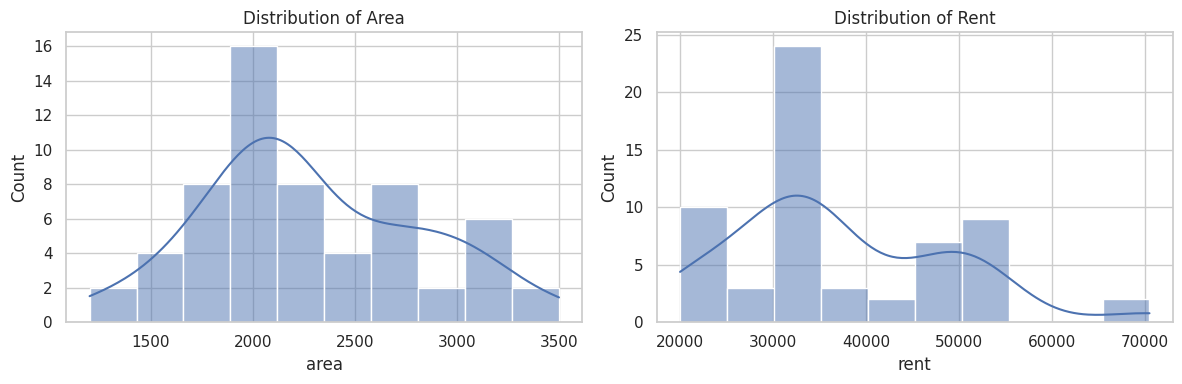

In [ ]:
# Distribution plots
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.histplot(df['area'], bins=10, kde=True, ax=axes[0])
axes[0].set_title('Distribution of Area')

sns.histplot(df['rent'], bins=10, kde=True, ax=axes[1])
axes[1].set_title('Distribution of Rent')

plt.tight_layout()
plt.show()


Scatter Plot – Area vs Rent

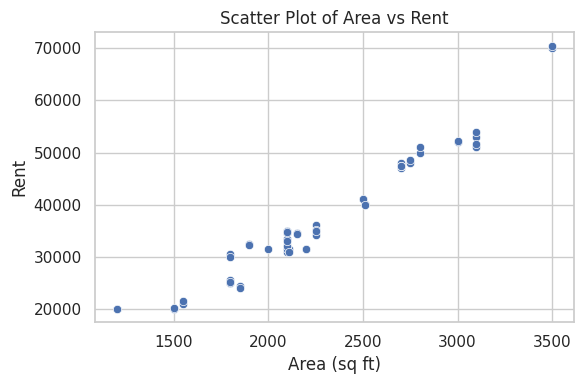

In [ ]:
# Scatter plot
plt.figure(figsize=(6, 4))
sns.scatterplot(x='area', y='rent', data=df)
plt.title('Scatter Plot of Area vs Rent')
plt.xlabel('Area (sq ft)')
plt.ylabel('Rent')
plt.tight_layout()
plt.show()


Correlation HeatMap


Correlation Matrix:
          area      rent
area  1.000000  0.974807
rent  0.974807  1.000000


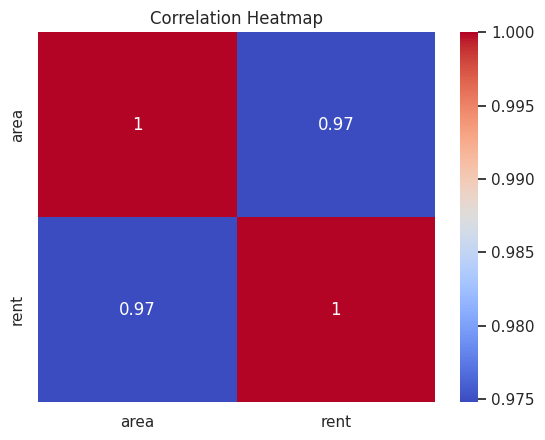

In [ ]:
# Correlation
correlation = df.corr(numeric_only=True)
print("Correlation Matrix:")
print(correlation)

# Optional heatmap
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


 Linear Regression


In [ ]:
from sklearn.linear_model import LinearRegression

# Reshape data
X = df[['area']]
y = df['rent']

# Train model
model = LinearRegression()
model.fit(X, y)

# Model coefficients
print(f"Intercept: {model.intercept_}")
print(f"Coefficient (slope): {model.coef_[0]}")


Intercept: -11469.735446431114
Coefficient (slope): 21.29266147361196


Plot Regression Line

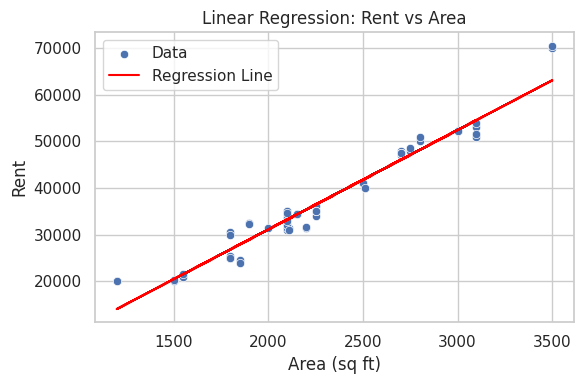

In [ ]:
# Plotting regression line
plt.figure(figsize=(6, 4))
sns.scatterplot(x='area', y='rent', data=df, label='Data')
plt.plot(df['area'], model.predict(X), color='red', label='Regression Line')
plt.title('Linear Regression: Rent vs Area')
plt.xlabel('Area (sq ft)')
plt.ylabel('Rent')
plt.legend()
plt.tight_layout()
plt.show()


Predict on New Values

In [ ]:
# Predict rent for a new area
new_area = pd.DataFrame({'area': [1800, 2500, 3200]})
predicted_rent = model.predict(new_area)
print("Predicted Rent:")
print(pd.DataFrame({'area': new_area['area'], 'predicted_rent': predicted_rent}))


Predicted Rent:
   area  predicted_rent
0  1800    26857.055206
1  2500    41761.918238
2  3200    56666.781269
